In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

from sklearn.preprocessing import StandardScaler

In [2]:
train = pd.read_csv('data/dengue_features_train.csv')
test = pd.read_csv('data/dengue_features_test.csv')
train_labels = pd.read_csv('data/dengue_labels_train.csv')
submission_data = pd.read_csv('data/submission_format.csv')

### Pre-processing

In [3]:
train_dengue = pd.merge(train,train_labels,on=['city','year','weekofyear'])

In [4]:
train_dengue.head(10)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
5,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,299.630000,...,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1,2
6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,...,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7,4
7,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,...,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1,5
8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,...,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1,10
9,sj,1990,27,1990-07-02,NaN,0.121550,0.160683,0.202567,14.41,300.154286,...,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1,6


In [5]:
train_copy = train_dengue.copy()

### EDA

In [6]:
train_dengue.city.value_counts()

sj    936
iq    520
Name: city, dtype: int64

In [7]:
sj_city = train_dengue[train_dengue['city'] == 'sj']
iq_city = train_dengue[train_dengue['city'] == 'iq']

/Users/suniljacob/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0.98,'Average temperature')

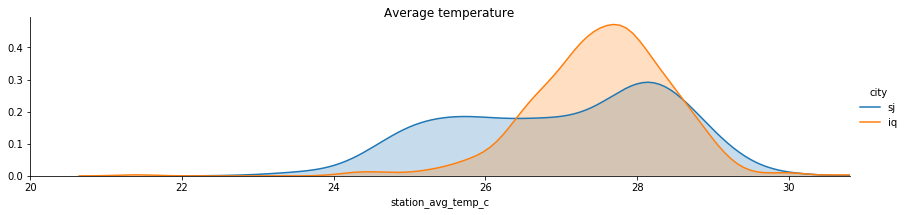

In [9]:
fig = sns.FacetGrid(train_dengue, hue='city', aspect=4) 
fig.map(sns.kdeplot,'station_avg_temp_c',shade=True)
max_x = train_dengue.station_avg_temp_c.max()
fig.set(xlim=(20,max_x))
fig.add_legend()
fig.fig.suptitle("Average temperature")

From the graph we can see that Iquitos experiences higher temperature than San Juan

/Users/suniljacob/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0.98,'Precipitation')

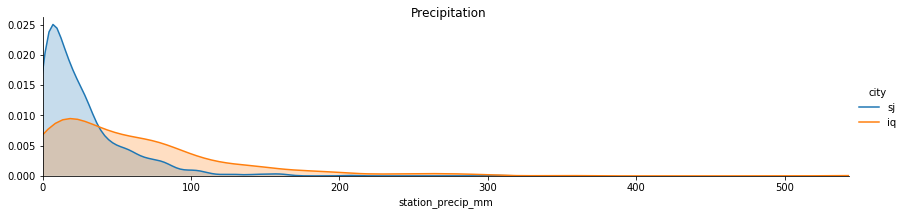

In [13]:
fig = sns.FacetGrid(train_dengue, hue='city', aspect=4) 
fig.map(sns.kdeplot,'station_precip_mm',shade=True)
max_x = train_dengue.station_precip_mm.max()
min_x = train_dengue.station_precip_mm.min()
fig.set(xlim=(0,max_x))
fig.add_legend()
fig.fig.suptitle("Precipitation")

In [17]:
train_dengue.groupby('city')['total_cases'].mean()

city
iq     7.565385
sj    34.180556
Name: total_cases, dtype: float64

It seems there are lot of dengue cases in San Juan

/Users/suniljacob/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/suniljacob/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0.98,'Evolution of dengue disease through time')

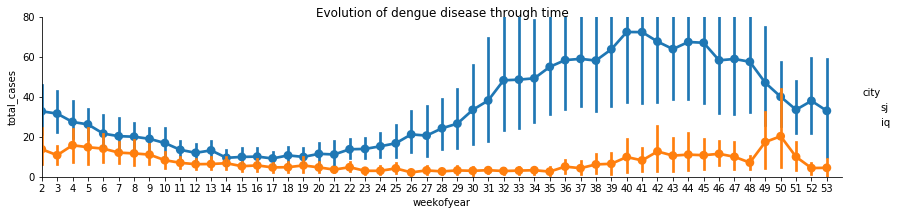

In [14]:
fig = sns.FacetGrid(train_dengue, hue='city', aspect=4) 
fig.map(sns.pointplot,'weekofyear','total_cases')
max_x = train_dengue.weekofyear.max()
min_x = train_dengue.weekofyear.min()
fig.set(xlim=(min_x,max_x))
fig.set(ylim=(0, 80))
fig.add_legend()
fig.fig.suptitle("Evolution of dengue disease through time")

In SanJuan, the dengue virus is more active from the half of the year. However in Iquitos the disease develops much slower than and it reaches its peak in Week 50

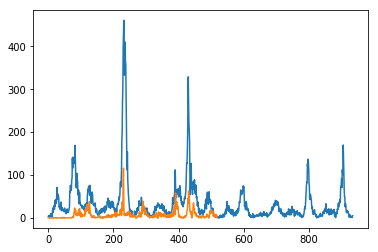

In [18]:
plt.plot(range(len(sj_city)), sj_city.total_cases.values)
plt.plot(range(len(iq_city)), iq_city.total_cases.values)

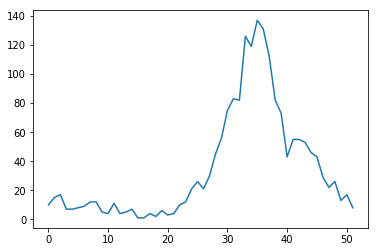

In [19]:
plt.plot(range(len(sj_city[sj_city.year==2005])), sj_city[sj_city.year==2005].total_cases.values)

In [20]:
train_dengue = train_dengue.join(pd.get_dummies(train_dengue.city))

In [21]:
train_dengue.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,iq,sj
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,0,1
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,0,1
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,0,1
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,0,1
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,0,1


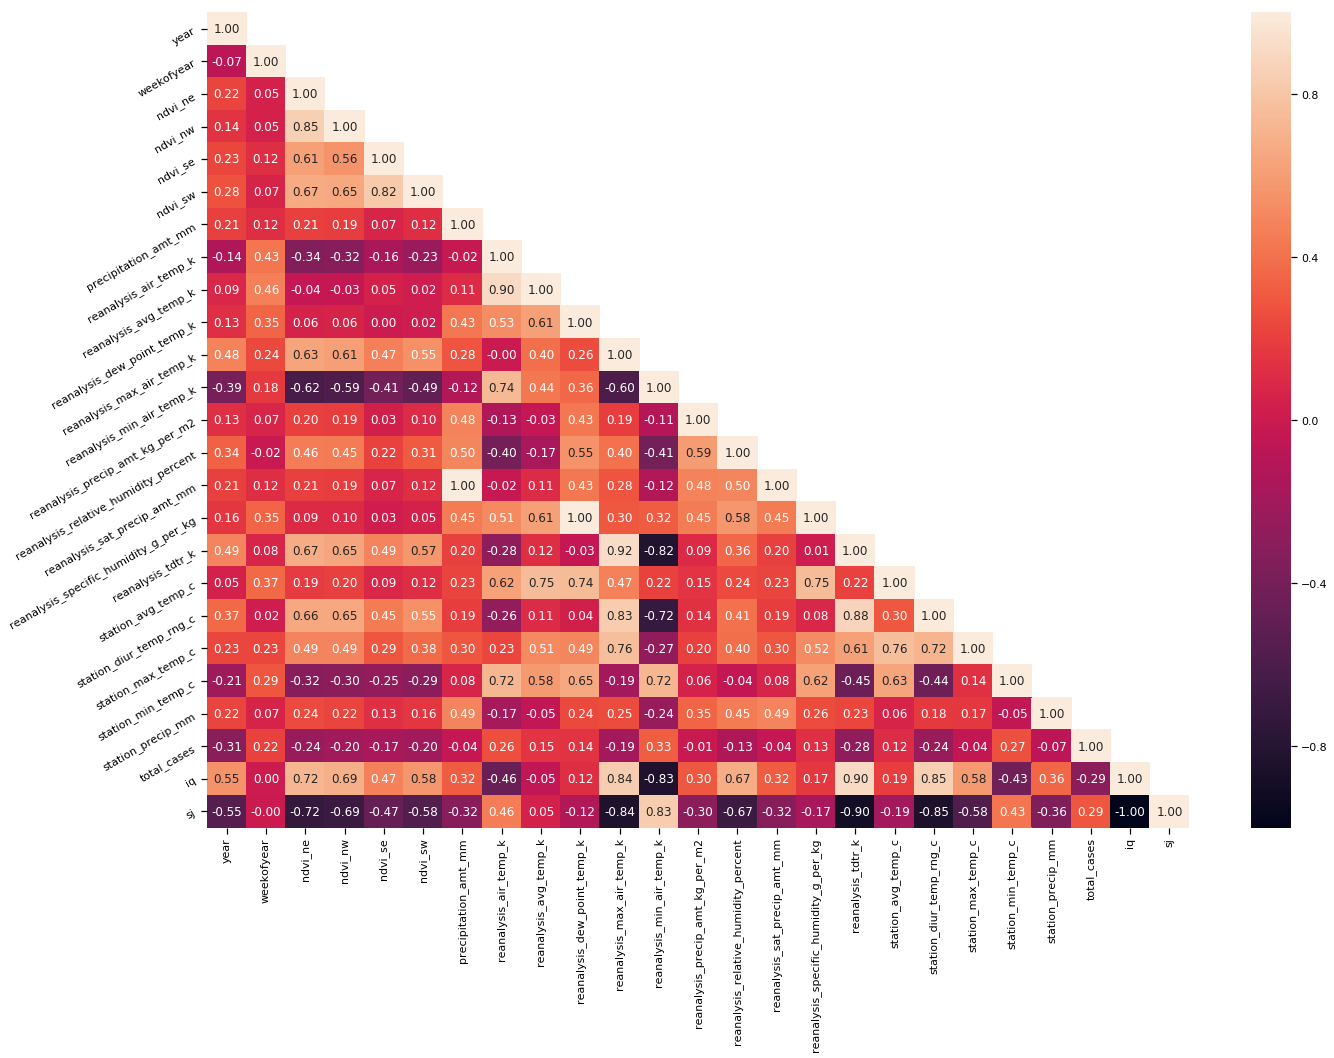

In [22]:
corr = train_dengue.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5}) 
plt.figure(figsize=(22,15))
# create a mask so we only see the correlation values once 
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f') 
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90) 
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [23]:
#train_dengue.drop(['city','year','week_start_date'],axis=1,inplace=True)
train_dengue.drop(['city', 'ndvi_ne', 'week_start_date'],axis=1,inplace=True)

In [24]:
train_dengue.isna().sum()

year                                      0
weekofyear                                0
ndvi_nw                                  52
ndvi_se                                  22
ndvi_sw                                  22
precipitation_amt_mm                     13
reanalysis_air_temp_k                    10
reanalysis_avg_temp_k                    10
reanalysis_dew_point_temp_k              10
reanalysis_max_air_temp_k                10
reanalysis_min_air_temp_k                10
reanalysis_precip_amt_kg_per_m2          10
reanalysis_relative_humidity_percent     10
reanalysis_sat_precip_amt_mm             13
reanalysis_specific_humidity_g_per_kg    10
reanalysis_tdtr_k                        10
station_avg_temp_c                       43
station_diur_temp_rng_c                  43
station_max_temp_c                       20
station_min_temp_c                       14
station_precip_mm                        22
total_cases                               0
iq                              

In [26]:
#train_dengue.dropna(inplace=True)
train_dengue.fillna(train_dengue.mean(),inplace=True)

In [27]:
train_dengue.isna().sum()

year                                     0
weekofyear                               0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
total_cases                              0
iq                                       0
sj         

In [28]:
train_dengue.shape

(1456, 24)

In [30]:
train_dengue.columns

Index(['year', 'weekofyear', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases', 'iq', 'sj'],
      dtype='object')

In [ ]:
train_dengue.drop(['reanalysis_dew_point_temp_k','precipitation_amt_mm'],axis=1,inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a21a6a240>,
      dtype=object)

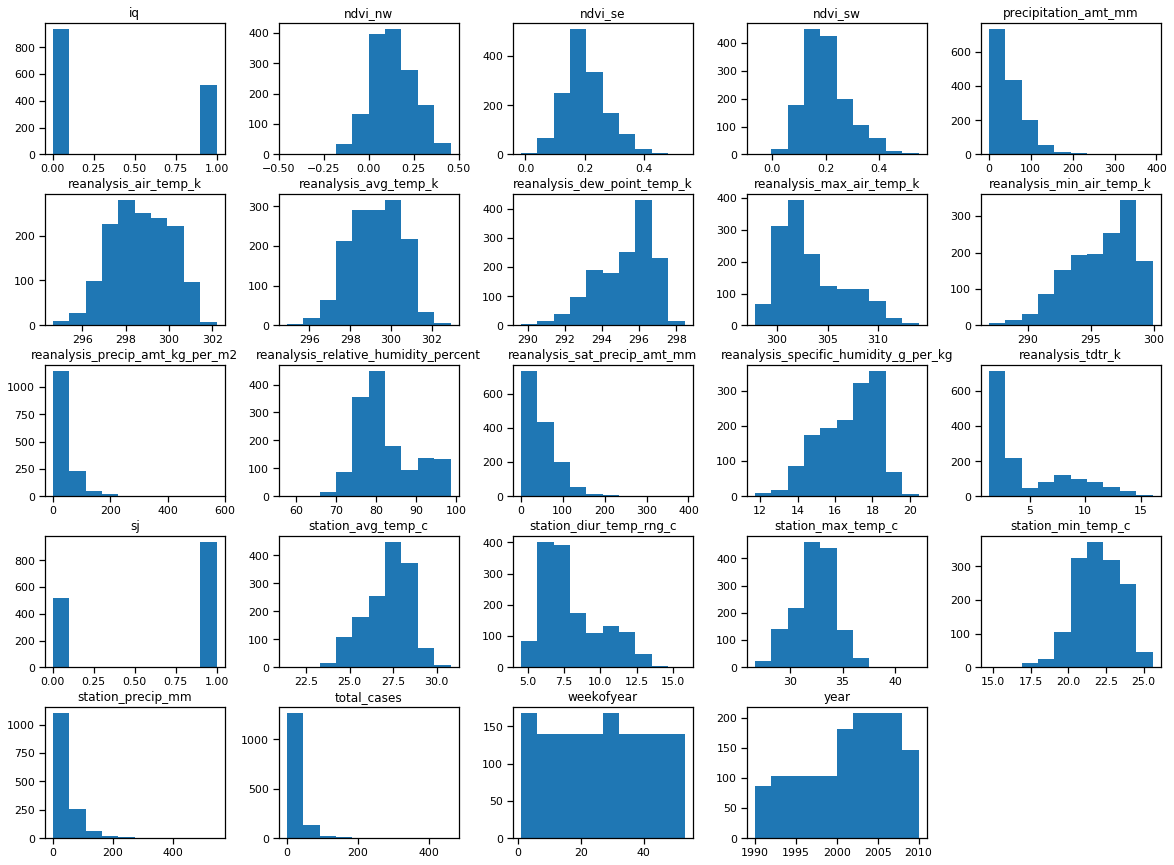

In [32]:
train_dengue.hist(figsize=(20,15),grid=False)

In [ ]:
sc = StandardScaler()
scaled_data = sc.fit_transform(train_dengue)

### Splitting into training and test set

In [33]:
# Splitting into training and test set
X = train_dengue.drop(['total_cases'],axis=1)
y = train_dengue['total_cases']

In [34]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,test_size=0.3, random_state=42,
                                                                           shuffle=False)

In [ ]:
# Random model
y_p = np.full(len(y_test), np.mean(y_train))
mean_absolute_error(y_test, y_p)

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [ ]:
mean_absolute_error(y_test,y_pred)

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.xlabel("actual number of cases")
plt.ylabel("Predicted dengue cases")
plt.show()

### L1 - Lasso regression

In [ ]:
lasso = linear_model.Lasso(alpha=0.5)
lasso.fit(X_train,y_train)
lasso_pred = lasso.predict(X_test)
mean_absolute_error(y_test,lasso_pred)

### L2 - Ridge regression

In [ ]:
ridge = linear_model.Ridge(alpha=50)
ridge.fit(X_train,y_train)
ridge_pred = ridge.predict(X_test)
mean_absolute_error(y_test,ridge_pred)

### Test Data set

In [40]:
test = pd.read_csv('data/dengue_features_test.csv')

In [41]:
test = test.join(pd.get_dummies(test.city))

In [42]:
test.drop(['city', 'ndvi_ne', 'week_start_date'],axis=1,inplace=True)

In [44]:
test.shape

(416, 23)

In [45]:
# testing with actual data set
test.head()

,year,weekofyear,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,iq,sj
0,2008,18,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,...,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2,0,1
1,2008,19,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,...,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3,0,1
2,2008,20,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,...,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0,0,1
3,2008,21,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,...,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3,0,1
4,2008,22,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,...,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1,0,1


In [46]:
test.fillna(0,inplace=True)
test.isna().sum()

year                                     0
weekofyear                               0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
iq                                       0
sj                                       0
dtype: int6

In [ ]:
test.drop(['precipitation_amt_mm','reanalysis_dew_point_temp_k'],axis=1,inplace=True)

In [ ]:
test.info()

In [ ]:
final_sub = lr.predict(test)
final_sub = final_sub.astype('int64')
final_sub[:5]

In [ ]:
submission_data.total_cases = final_sub
submission_data.to_csv('lasso_sub.csv',index=None,header=True)
submission_data.head()

In [ ]:
## Random Forest Regressor

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
rf = RandomForestRegressor(n_estimators=300,n_jobs=-1)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [50]:
rf_sub_1 = rf.predict(X_test)

In [47]:
rf_sub = rf.predict(test)
rf_sub[:5]

array([4.9       , 5.        , 6.37333333, 7.53      , 7.53666667])

In [48]:
rf_sub = rf_sub.astype('int64')
rf_sub[:5]

array([4, 5, 6, 7, 7])

In [51]:
mean_absolute_error(y_test,rf_sub_1)

8.546636155606407

In [ ]:
submission_data.total_cases = rf_sub
submission_data.to_csv('rf_sub.csv',index=None,header=True)
submission_data.head()

### Support Vector Machine

In [ ]:
from sklearn.svm import SVR
SVM = SVR(C=1.0, epsilon=0.2)
SVM.fit(X_train, y_train)
svm_predicted=SVM.predict(X_test)
svm_result = mean_absolute_error(y_test, svm_predicted)
svm_result